<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# **TPS0 - Primeros pasos en la simulación**

### *Autora: Catalina Gonzalez Araujo*

# <u>**Introducción**</u>

En este primer trabajo comenzamos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos.

Programamos e implementamos una funcion en Python para generar señales senoidales y que nos permita parametrizar:
- La amplitud maxima senoidal
- El valor medio de la amplitud
- La frecuencia de la señal
- La fase inicial
- El numero de muestras a generar
- La frecuencia de muestreo del sistema

# <u>**Desrrollo**</u>

Para el desarrollo de este trabajo (*TS0*), utilice un archivo proporcionado por la catedra sobre señales senoidales, el cual podes ver en [esta página](https://github.com/Catalina-git/APS/blob/main/Hola%20Mundo/mi_senoidal.py).

En primer lugar, se importaron las librerías necesarias para poder programar el código del trabajo: **NumPy**, para realizar cálculos numéricos y trabajar con vectores, y **Matplotlib**, para graficar la señal generada.  

La función `mi_funcion_sen` recibe los parámetros indicados en la introducción y sigue los siguientes pasos:

1. <font color=red><u> **Cálculo del periodo de muestreo** </u></font>

   Se calcula el tiempo que transcurre entre dos muestras consecutivas como: $Ts = \frac{1}{frecADC} $

   donde `frecADC` es la frecuencia de muestreo.

2. <font color=red><u> **Generación del vector de tiempo </u></font>(`tt`)**

   Se utiliza `np.arange` para crear un array que comienza en 0 y avanza de a Ts pasos, hasta alcanzar N muestras.  
   Entonces, el vector `tt` (*eje x*) contiene los instantes de tiempo en los que se evaluará la señal.

3. <font color=red><u> **Cálculo de la señal </u></font> (`xx`)**  
   Para calcular la señal, utilicé la ecuación de la senoidal: $x(t) = \text{amplitud} \cdot \sin( 2 \pi \cdot f \cdot tt + \phi ) + \text{offset}$

   donde...  
- `amplitud`: amplitud máxima de la onda, en Volts.  
- `offset`: es mi amplitud media, en Volts.  
- `frecuencia`: es la frecuencia de la señal en Hz.  
- `fase`: desplazamiento inicial de la señal en radianes.  
- `tt`: vector de tiempo calculado en el paso anterior.

4. <font color=red><u> **Resultados** </u></font> 
   Como resultado, la función devuelve dos vectores:  
   - `tt`: vector tiempo (*eje x*).
   - `xx`: vector amplitud de la señal (*eje y*).


In [9]:
 # Primero importo la libreria numpy
import numpy as np
import matplotlib.pyplot as plt

# Defino mi funcion
def mi_funcion_sen(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, frecADC = 1000):
    """
    - amplitud: es la amplitud maxima. [amplitud] = [V]
    - offset: es mi amplitud media. [offset] = [V]
    - frecuencia: es la frecuencia de la señal. [frecuencia] = [Hz]
    - fase: es la fase inicial. [fase] = [rad]
    - N: es la cantidad de muestras a generar
    - frecADC: es la frecuencia de muestreo del ADC. [frecADC] = [Hz]
    """
    Ts = 1/frecADC # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) + offset

    return tt, xx

Finalmente, se eligieron aleatoriamente los valores de los parametros, se llamó a la función y se graficó el resultado de la señal senoidal, mostrando la forma de la onda generada.

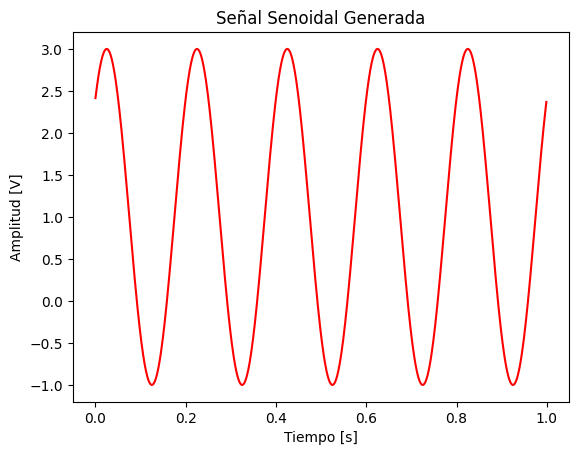

In [10]:
# Defino mis variables
amplitud = 2
offset = 1
frecuencia = 5
fase = np.pi/4
N = 1000
frecADC = 1000

# Llamo a mi funcion
tt, xx = mi_funcion_sen(amplitud, offset, frecuencia, fase, N, frecADC)

# Grafico la señal
plt.title("Señal Senoidal Generada")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tt, xx, linestyle = '-', color = 'r' ) # Genero el grafico de la señal con linea 'continua' de color 'rojo'

# <u>**Conclusión**</u>

En conclusion, este trabajo me ayudo a refrescar contenidos previos, y me sirvio para empezar a aprender y a familiarizarme con los temas de la materia. 

En un principio se me dificultó entender que era lo que me pedía la consigna, y algunos parametros que se utilizaron en las ecuaciones (como calcularlos, que era cada uno, etc.), pero con el trabajo en grupo con mis compañros, y la ayuda de la inteligencia artificial (Chat GPT), pude terminar de comprender la consigna y algunos errores de comprension que estaba teniendo.

Me entusiasmó esta materia porque voy a ver cosas mas relacionadas a la carrera (Ingeniería Biomédica). Espero poder analizar señales, y entender y aprender que es lo que significa cada una de las señales que veamos. 
